First 10 rows of the dataset:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3         

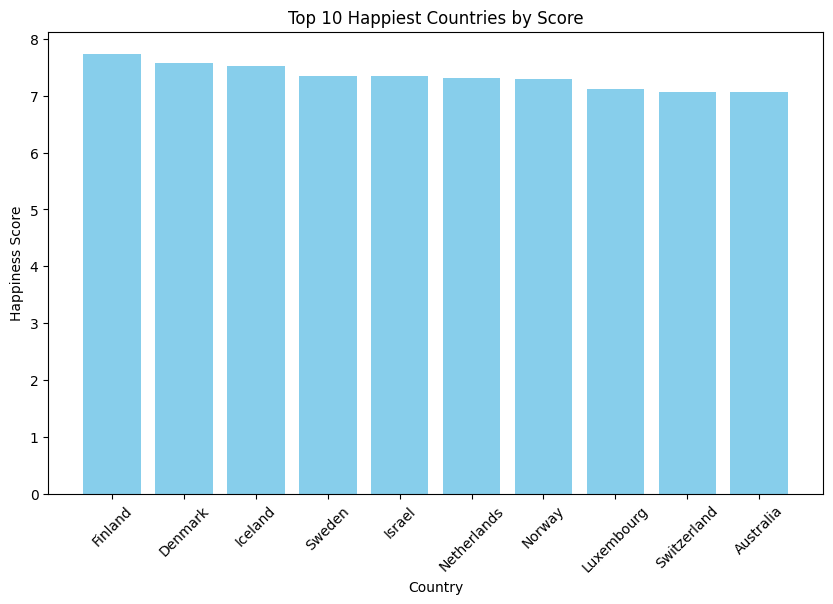

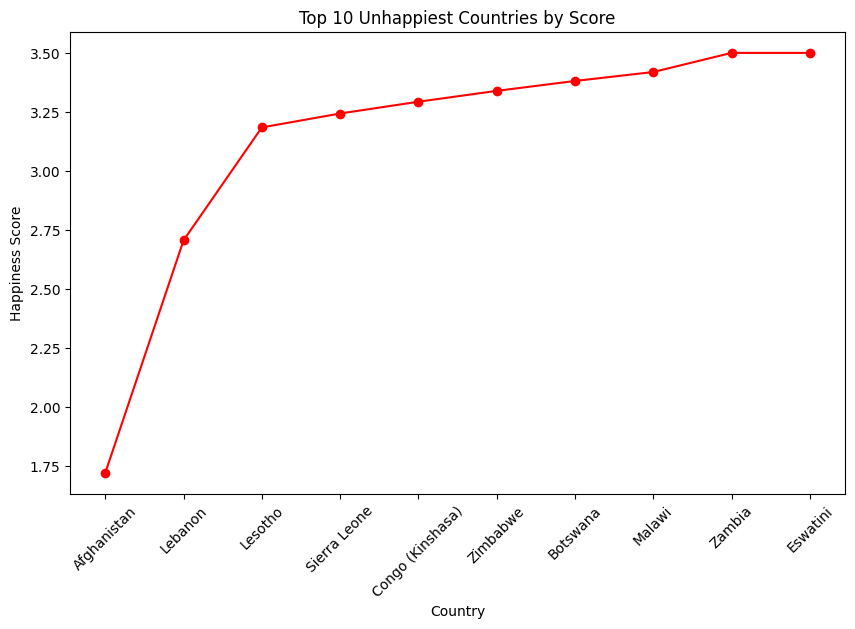

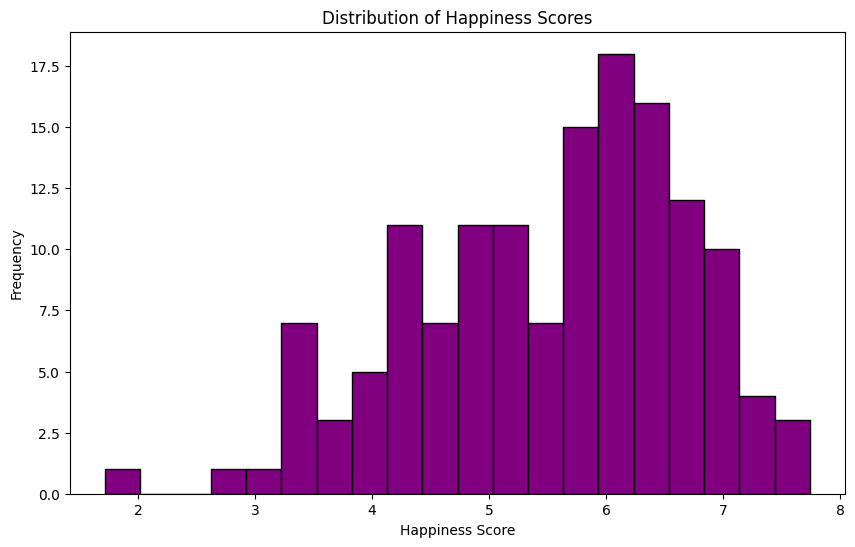

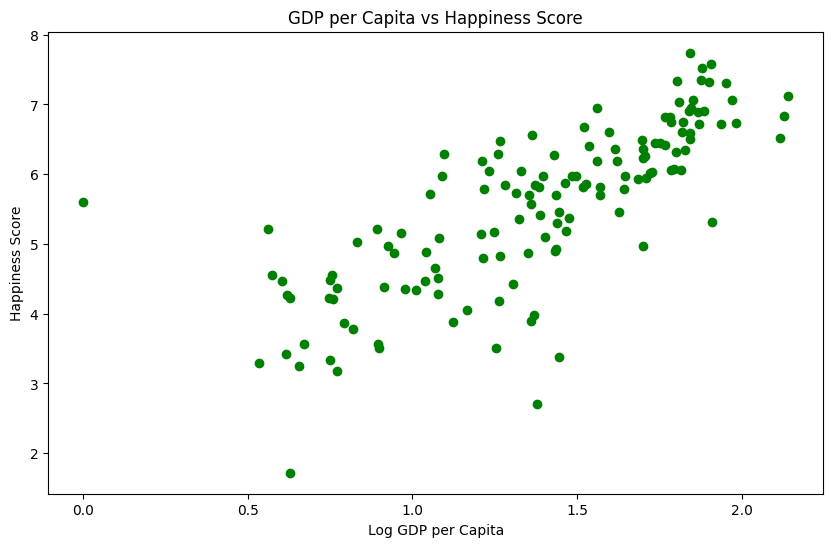


South Asia dataset saved as 'South_Asia_Dataset.csv'


In [ ]:
# Task 1
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/content/drive/MyDrive/DATASETS/WHR-2024-5CS037.csv'
data = pd.read_csv(file_path)

# 1. Dataset Overview
# a. Display the first 10 rows
print("First 10 rows of the dataset:")
print(data.head(10))

# b. Identify the number of rows and columns
print("\nNumber of rows and columns:")
print(data.shape)

# c. List all columns and their data types
print("\nColumns and their data types:")
print(data.dtypes)

# 2. Basic Statistics
# a. Calculate mean, median, and standard deviation for the Score column
mean_score = data['score'].mean()
median_score = data['score'].median()
std_score = data['score'].std()

print("\nBasic Statistics for 'Score':")
print(f"Mean: {mean_score}, Median: {median_score}, Standard Deviation: {std_score}")

# b. Identify the country with the highest and lowest happiness scores
highest_score_country = data.loc[data['score'].idxmax(), 'Country name']
lowest_score_country = data.loc[data['score'].idxmin(), 'Country name']

print("\nCountry with the highest score:", highest_score_country)
print("Country with the lowest score:", lowest_score_country)

# 3. Missing Values
print("\nMissing values in the dataset:")
print(data.isnull().sum())

# 4. Filtering and Sorting
# a. Filter the dataset to show countries with Score > 7.5
filtered_data = data[data['score'] > 7.5]

# b. Sort the filtered dataset by GDP per Capita in descending order and display the top 10 rows
sorted_data = filtered_data.sort_values(by='Log GDP per capita', ascending=False).head(10)
print("\nTop 10 countries with Score > 7.5 sorted by GDP per Capita:")
print(sorted_data)

# 5. Adding New Columns
# a. Create a new column for Happiness Category
def categorize_happiness(score):
    if score < 4:
        return "Low"
    elif 4 <= score <= 6:
        return "Medium"
    else:
        return "High"

data['Happiness Category'] = data['score'].apply(categorize_happiness)
print("\nHappiness Category added to the dataset.")

# 6. Data Visualizations
# a. Bar Plot: Top 10 happiest countries by Score
top_10_happiest = data.nlargest(10, 'score')
plt.figure(figsize=(10, 6))
plt.bar(top_10_happiest['Country name'], top_10_happiest['score'], color='skyblue')
plt.title("Top 10 Happiest Countries by Score")
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel("Happiness Score")
plt.show()

# b. Line Plot: Top 10 unhappiest countries by Score
top_10_unhappiest = data.nsmallest(10, 'score')
plt.figure(figsize=(10, 6))
plt.plot(top_10_unhappiest['Country name'], top_10_unhappiest['score'], marker='o', color='red')
plt.title("Top 10 Unhappiest Countries by Score")
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel("Happiness Score")
plt.show()

# c. Histogram for Score column
plt.figure(figsize=(10, 6))
plt.hist(data['score'], bins=20, color='purple', edgecolor='black')
plt.title("Distribution of Happiness Scores")
plt.xlabel("Happiness Score")
plt.ylabel("Frequency")
plt.show()

# d. Scatter Plot: GDP per Capita vs Score
plt.figure(figsize=(10, 6))
plt.scatter(data['Log GDP per capita'], data['score'], color='green')
plt.title("GDP per Capita vs Happiness Score")
plt.xlabel("Log GDP per Capita")
plt.ylabel("Happiness Score")
plt.show()

# 3.2 Problem 2 - South Asia Dataset
# a. Define South Asian countries
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

# b. Filter the dataset for South Asian countries
south_asia_data = data[data['Country name'].isin(south_asian_countries)]

# c. Save the filtered dataframe as a CSV
south_asia_data.to_csv('South_Asia_Dataset.csv', index=False)
print("\nSouth Asia dataset saved as 'South_Asia_Dataset.csv'")



South Asian countries ranked by Composite Score:
           Country name  Composite Score
29            Singapore           1.4862
16              Ireland           1.4786
7            Luxembourg           1.4753
2               Iceland           1.4529
6                Norway           1.4471
..                  ...              ...
135              Malawi           0.4745
142         Afghanistan           0.3238
61              Bahrain              NaN
87           Tajikistan              NaN
102  State of Palestine              NaN

[143 rows x 2 columns]


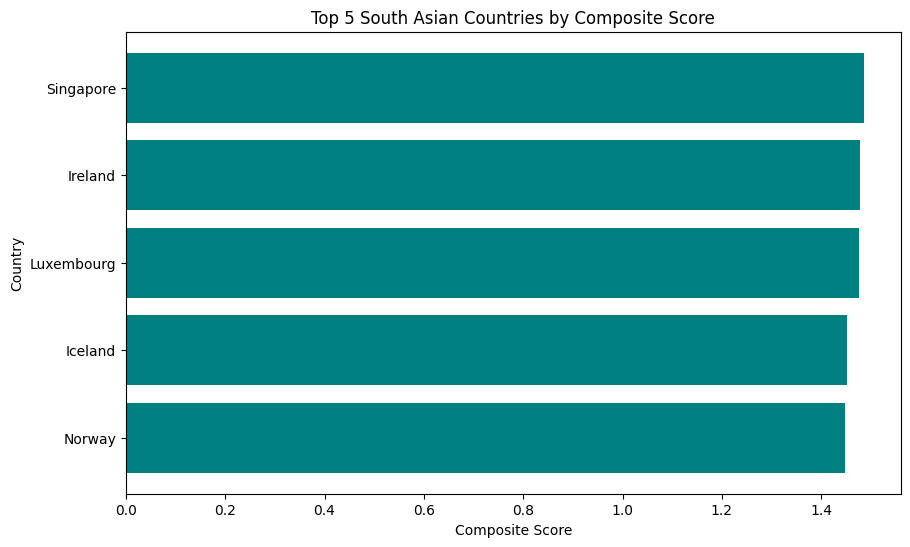

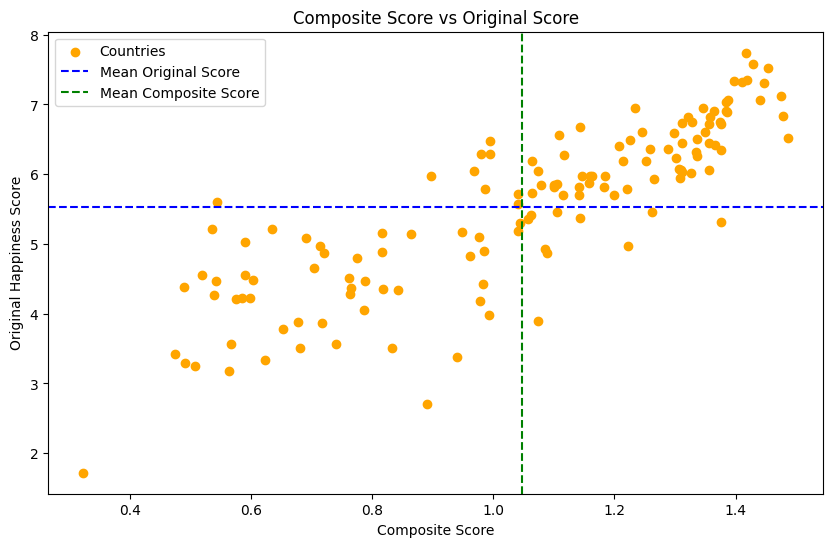


The scatter plot shows the relationship between the Composite Score and the original Score.
Countries with higher Composite Scores generally align with higher original Scores,
indicating that GDP per Capita, Social Support, and Healthy Life Expectancy contribute significantly
to overall happiness. However, deviations may exist for countries where other factors,
such as freedom, generosity, or perceptions of corruption, play a larger role in determining happiness.



In [ ]:
#Task 2

# 1. Create a new column called Composite Score
south_asia_data['Composite Score'] = (
    0.40 * south_asia_data['Log GDP per capita'] +
    0.30 * south_asia_data['Social support'] +
    0.30 * south_asia_data['Healthy life expectancy']
)

# 2. Rank the South Asian countries based on the Composite Score in descending order
south_asia_data = south_asia_data.sort_values(by='Composite Score', ascending=False)
print("\nSouth Asian countries ranked by Composite Score:")
print(south_asia_data[['Country name', 'Composite Score']])

# 3. Visualize the top 5 countries using a horizontal bar chart
top_5_composite = south_asia_data.head(5)
plt.figure(figsize=(10, 6))
plt.barh(top_5_composite['Country name'], top_5_composite['Composite Score'], color='teal')
plt.title("Top 5 South Asian Countries by Composite Score")
plt.xlabel("Composite Score")
plt.ylabel("Country")
plt.gca().invert_yaxis()
plt.show()

# 4. Visualization to compare Composite Score with the original Score
plt.figure(figsize=(10, 6))
plt.scatter(south_asia_data['Composite Score'], south_asia_data['score'], color='orange', label='Countries')
plt.title("Composite Score vs Original Score")
plt.xlabel("Composite Score")
plt.ylabel("Original Happiness Score")
plt.axhline(y=south_asia_data['score'].mean(), color='blue', linestyle='--', label='Mean Original Score')
plt.axvline(x=south_asia_data['Composite Score'].mean(), color='green', linestyle='--', label='Mean Composite Score')
plt.legend()
plt.show()

# Discussion: Insights on alignment between Composite Score and Original Score
alignment_insights = """
The scatter plot shows the relationship between the Composite Score and the original Score.
Countries with higher Composite Scores generally align with higher original Scores,
indicating that GDP per Capita, Social Support, and Healthy Life Expectancy contribute significantly
to overall happiness. However, deviations may exist for countries where other factors,
such as freedom, generosity, or perceptions of corruption, play a larger role in determining happiness.
"""
print(alignment_insights)



Outlier Countries:
    Country name  score  Log GDP per capita
142  Afghanistan  1.721               0.628
78     Venezuela  5.607               0.000


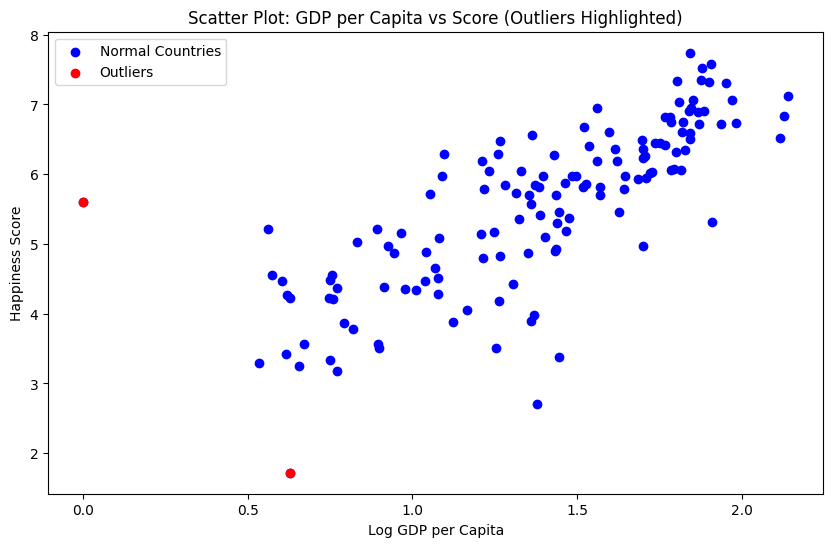


Outlier countries in South Asia are those with extreme values for Score or GDP per Capita based on the 1.5 × IQR rule.
These outliers, shown in red on the scatter plot, may represent unique socio-economic conditions, such as very high or low
wealth or happiness levels. They can significantly skew regional averages, leading to misinterpretation of the overall
happiness or economic standing of South Asia. Adjusting for these outliers in regional analyses can provide a more
representative picture of the region's status.



In [ ]:
#Task 3

# 1. Define the 1.5 × IQR rule for outlier detection
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Detect outliers for Score
score_outliers, score_lower, score_upper = detect_outliers(south_asia_data, 'score')

# Detect outliers for GDP per Capita
gdp_outliers, gdp_lower, gdp_upper = detect_outliers(south_asia_data, 'Log GDP per capita')

# Combine outliers
combined_outliers = pd.concat([score_outliers, gdp_outliers]).drop_duplicates()

# 2. Print the outlier details
print("\nOutlier Countries:")
print(combined_outliers[['Country name', 'score', 'Log GDP per capita']])

# 3. Create a scatter plot highlighting outliers
plt.figure(figsize=(10, 6))
plt.scatter(south_asia_data['Log GDP per capita'], south_asia_data['score'], color='blue', label='Normal Countries')
plt.scatter(combined_outliers['Log GDP per capita'], combined_outliers['score'], color='red', label='Outliers')
plt.title("Scatter Plot: GDP per Capita vs Score (Outliers Highlighted)")
plt.xlabel("Log GDP per Capita")
plt.ylabel("Happiness Score")
plt.legend()
plt.show()

# 4. Discuss the characteristics of these outliers
outlier_discussion = """
Outlier countries in South Asia are those with extreme values for Score or GDP per Capita based on the 1.5 × IQR rule.
These outliers, shown in red on the scatter plot, may represent unique socio-economic conditions, such as very high or low
wealth or happiness levels. They can significantly skew regional averages, leading to misinterpretation of the overall
happiness or economic standing of South Asia. Adjusting for these outliers in regional analyses can provide a more
representative picture of the region's status.
"""
print(outlier_discussion)


Pearson Correlation between 'Freedom to make life choices' and Score: 0.64
Pearson Correlation between 'Generosity' and Score: 0.13


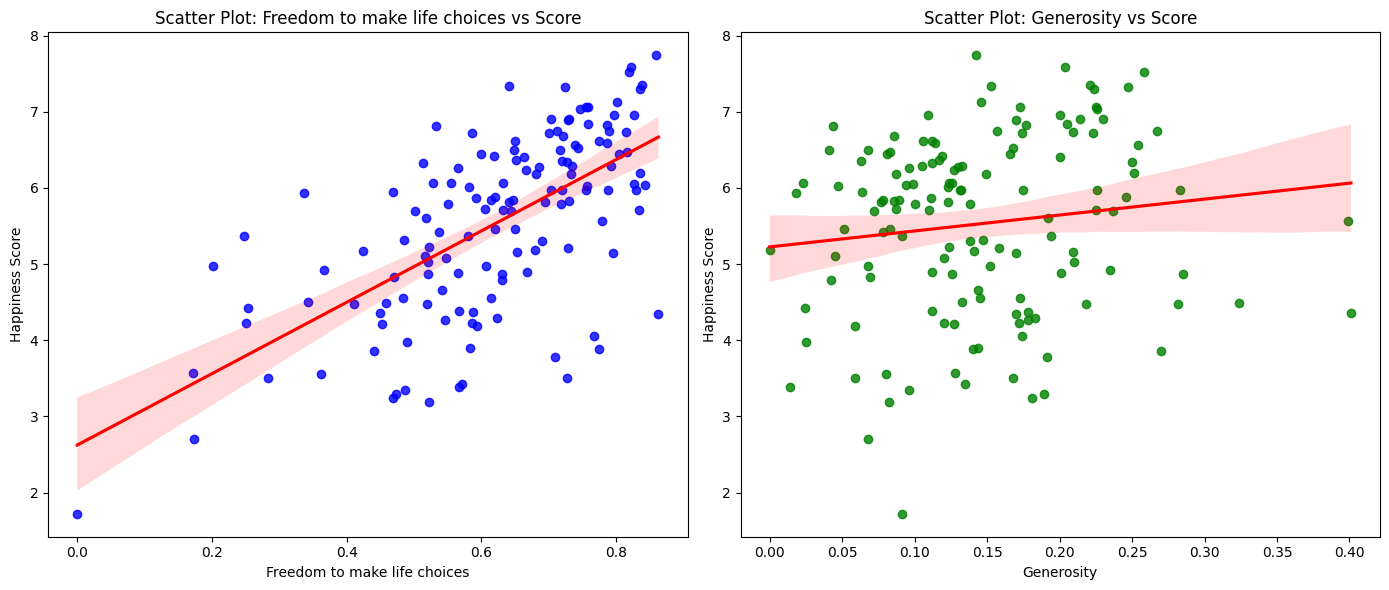


Based on the Pearson correlation values:
- The relationship between 'Freedom to make life choices' and Score has a correlation of 0.64, indicating a strong relationship.
- The relationship between 'Generosity' and Score has a correlation of 0.13, indicating a weaker relationship.

From the scatter plots, the trendlines visually confirm these relationships. Stronger correlations suggest a more consistent
positive or negative trend, while weaker correlations indicate more scattered data points.



In [ ]:
#Task 4

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Ensure there are no NaN or inf values in the relevant columns
relevant_columns = ['score', 'Freedom to make life choices', 'Generosity']
cleaned_data = south_asia_data[relevant_columns].dropna()  # Drop rows with NaN
cleaned_data = cleaned_data[(~cleaned_data.isin([float('inf'), float('-inf')])).all(axis=1)]  # Remove inf values

# 1. Calculate Pearson correlation for two metrics with the Score
metric_1 = 'Freedom to make life choices'
metric_2 = 'Generosity'

# Calculate correlations
corr_metric_1, _ = pearsonr(cleaned_data[metric_1], cleaned_data['score'])
corr_metric_2, _ = pearsonr(cleaned_data[metric_2], cleaned_data['score'])

print(f"Pearson Correlation between '{metric_1}' and Score: {corr_metric_1:.2f}")
print(f"Pearson Correlation between '{metric_2}' and Score: {corr_metric_2:.2f}")

# 2. Create scatter plots with trendlines
plt.figure(figsize=(14, 6))

# Scatter plot for Metric 1
plt.subplot(1, 2, 1)
sns.regplot(x=metric_1, y='score', data=cleaned_data, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title(f"Scatter Plot: {metric_1} vs Score")
plt.xlabel(metric_1)
plt.ylabel("Happiness Score")

# Scatter plot for Metric 2
plt.subplot(1, 2, 2)
sns.regplot(x=metric_2, y='score', data=cleaned_data, scatter_kws={'color': 'green'}, line_kws={'color': 'red'})
plt.title(f"Scatter Plot: {metric_2} vs Score")
plt.xlabel(metric_2)
plt.ylabel("Happiness Score")

plt.tight_layout()
plt.show()

# 3. Discuss the strongest and weakest relationships
relationship_discussion = f"""
Based on the Pearson correlation values:
- The relationship between '{metric_1}' and Score has a correlation of {corr_metric_1:.2f}, indicating {'a strong' if abs(corr_metric_1) > abs(corr_metric_2) else 'a weaker'} relationship.
- The relationship between '{metric_2}' and Score has a correlation of {corr_metric_2:.2f}, indicating {'a strong' if abs(corr_metric_2) > abs(corr_metric_1) else 'a weaker'} relationship.

From the scatter plots, the trendlines visually confirm these relationships. Stronger correlations suggest a more consistent
positive or negative trend, while weaker correlations indicate more scattered data points.
"""
print(relationship_discussion)



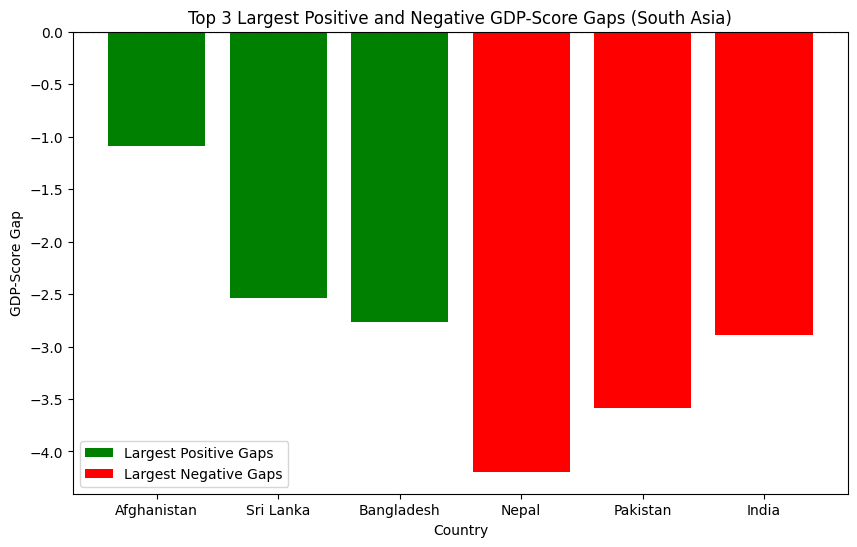

Ranked by GDP-Score Gap (Descending):
    Country name  GDP-Score Gap
142  Afghanistan         -1.093
127    Sri Lanka         -2.537
128   Bangladesh         -2.764
125        India         -2.888
107     Pakistan         -3.588
92         Nepal         -4.193

Ranked by GDP-Score Gap (Ascending):
    Country name  GDP-Score Gap
92         Nepal         -4.193
107     Pakistan         -3.588
125        India         -2.888
128   Bangladesh         -2.764
127    Sri Lanka         -2.537
142  Afghanistan         -1.093


In [ ]:
#Task 5
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/MyDrive/DATASETS/WHR-2024-5CS037.csv'
data = pd.read_csv(file_path)

# List of South Asian countries
south_asian_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

# Filter the dataset for South Asian countries
south_asian_data = data[data['Country name'].isin(south_asian_countries)].copy()

# Add a new column for GDP-Score Gap
south_asian_data['GDP-Score Gap'] = south_asian_data['Log GDP per capita'] - south_asian_data['score']

# Rank by GDP-Score Gap in ascending and descending orders
ranked_ascending = south_asian_data.sort_values(by='GDP-Score Gap', ascending=True)
ranked_descending = south_asian_data.sort_values(by='GDP-Score Gap', ascending=False)

# Get the top 3 largest positive and negative gaps
top_positive = ranked_descending.head(3)
top_negative = ranked_ascending.head(3)

# Plot the bar chart for visualization
plt.figure(figsize=(10, 6))
plt.bar(top_positive['Country name'], top_positive['GDP-Score Gap'], color='green', label='Largest Positive Gaps')
plt.bar(top_negative['Country name'], top_negative['GDP-Score Gap'], color='red', label='Largest Negative Gaps')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.title('Top 3 Largest Positive and Negative GDP-Score Gaps (South Asia)')
plt.xlabel('Country')
plt.ylabel('GDP-Score Gap')
plt.legend()
plt.show()

# Display rankings
print("Ranked by GDP-Score Gap (Descending):")
print(ranked_descending[['Country name', 'GDP-Score Gap']])

print("\nRanked by GDP-Score Gap (Ascending):")
print(ranked_ascending[['Country name', 'GDP-Score Gap']])


South Asia Mean Score: 3.895666666666667 Std Dev: 1.1770690152521504
Middle East Mean Score: 5.412100000000001 Std Dev: 1.5662011684327144
Region with higher happiness on average: Middle East


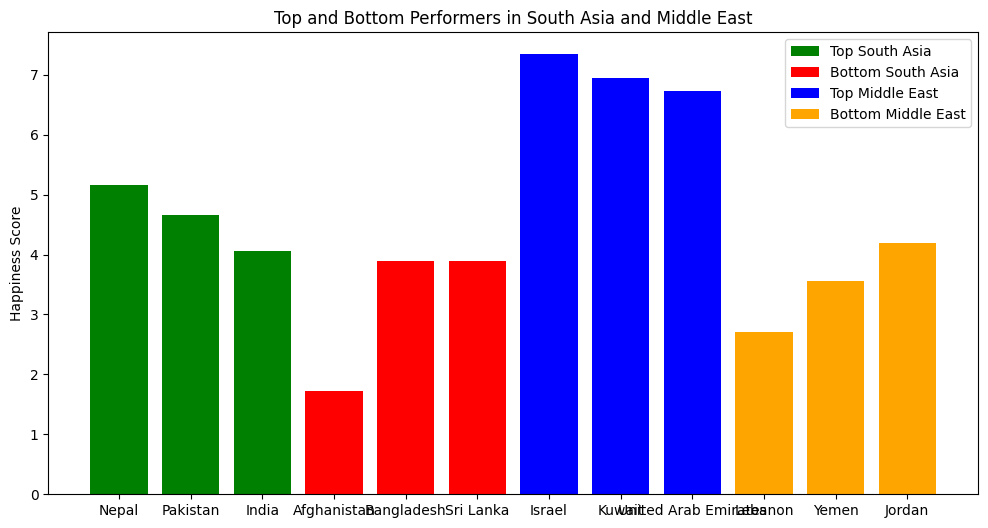

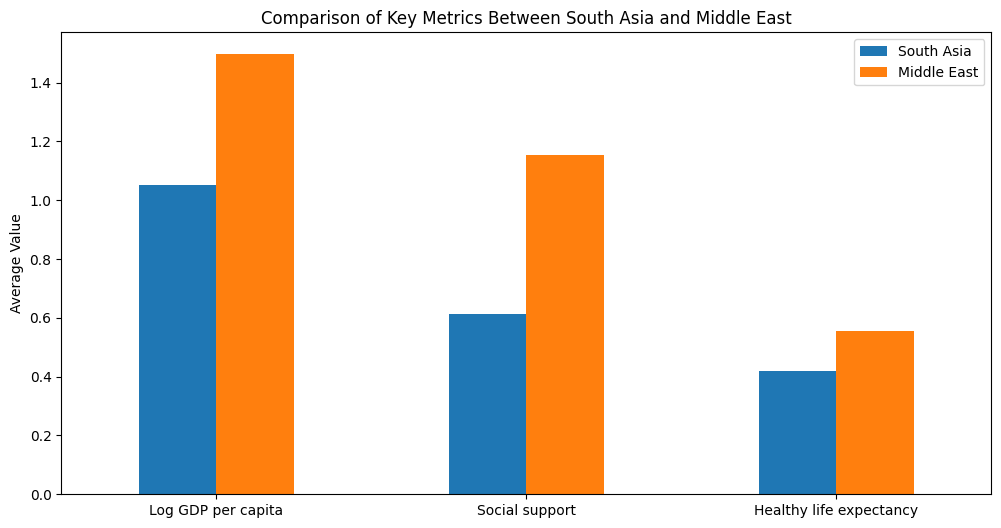

Metric showing largest disparity: Middle East
Middle East
Middle East
South Asia Range: 3.4370000000000003 CV: 0.3021482883337427
Middle East Range: 4.634 CV: 0.28938880812119405
Region with greater variability: South Asia


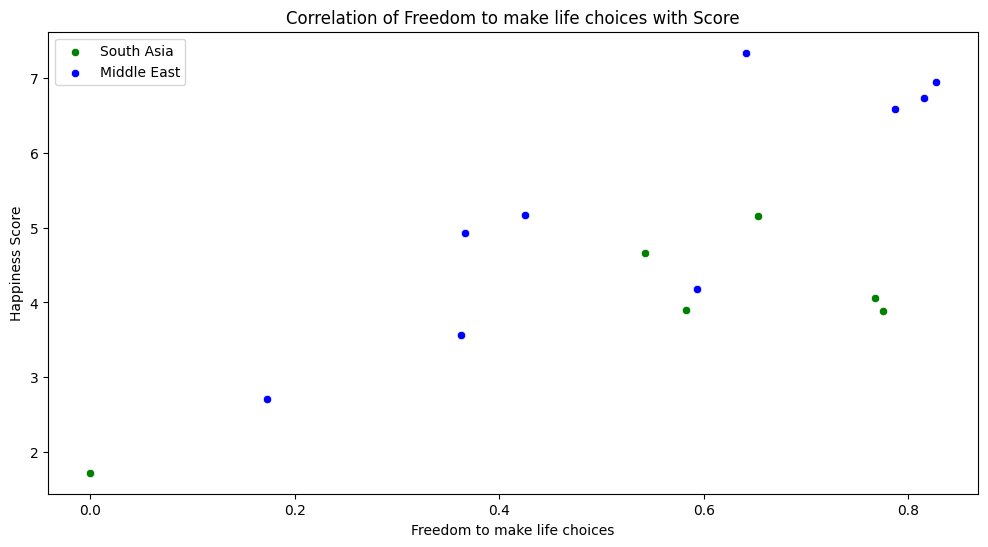

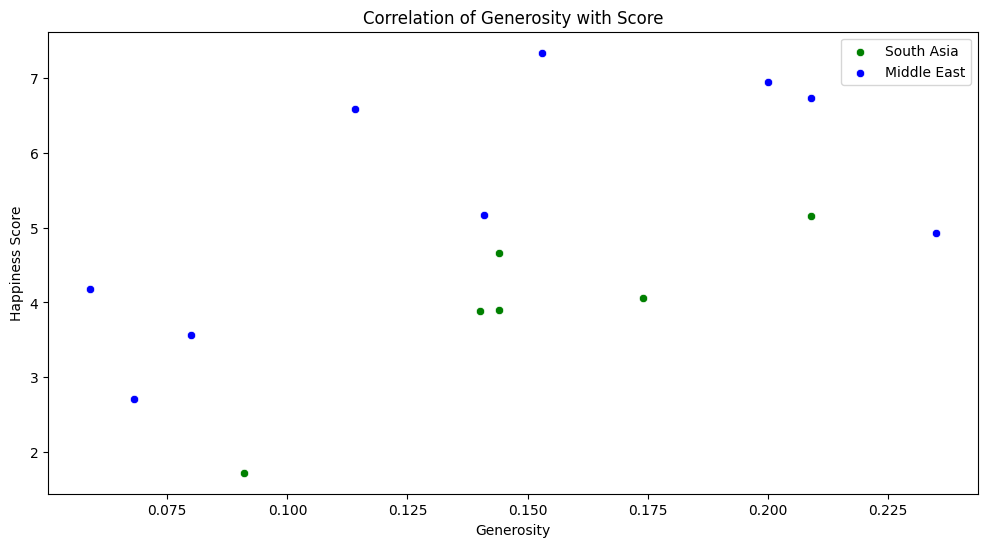

South Asia Outliers:
    Country name  score
142  Afghanistan  1.721
Middle East Outliers:
    Country name  score
4         Israel  7.341
12        Kuwait  6.951
132        Yemen  3.561
141      Lebanon  2.707


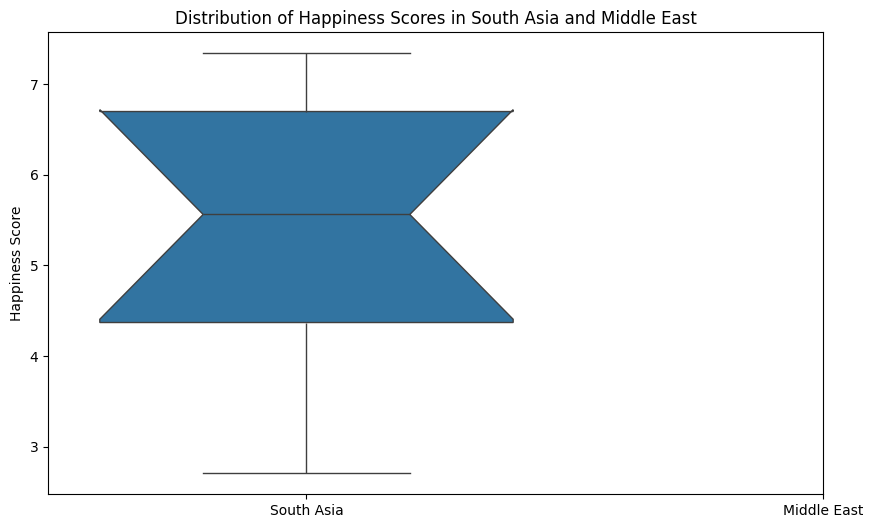

In [ ]:


# Define regions
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]
middle_eastern_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait",
    "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia",
    "Syria", "United Arab Emirates", "Yemen"
]

# Filter datasets for each region
south_asia = data[data['Country name'].isin(south_asian_countries)].copy()
middle_east = data[data['Country name'].isin(middle_eastern_countries)].copy()

# Task 1: Descriptive Statistics
south_asia_mean = south_asia['score'].mean()
south_asia_std = south_asia['score'].std()

middle_east_mean = middle_east['score'].mean()
middle_east_std = middle_east['score'].std()

print("South Asia Mean Score:", south_asia_mean, "Std Dev:", south_asia_std)
print("Middle East Mean Score:", middle_east_mean, "Std Dev:", middle_east_std)
print("Region with higher happiness on average:", "Middle East" if middle_east_mean > south_asia_mean else "South Asia")

# Task 2: Top and Bottom Performers
top_south_asia = south_asia.nlargest(3, 'score')
bottom_south_asia = south_asia.nsmallest(3, 'score')

top_middle_east = middle_east.nlargest(3, 'score')
bottom_middle_east = middle_east.nsmallest(3, 'score')

# Bar charts for top and bottom performers
plt.figure(figsize=(12, 6))
plt.bar(top_south_asia['Country name'], top_south_asia['score'], color='green', label='Top South Asia')
plt.bar(bottom_south_asia['Country name'], bottom_south_asia['score'], color='red', label='Bottom South Asia')
plt.bar(top_middle_east['Country name'], top_middle_east['score'], color='blue', label='Top Middle East')
plt.bar(bottom_middle_east['Country name'], bottom_middle_east['score'], color='orange', label='Bottom Middle East')
plt.title("Top and Bottom Performers in South Asia and Middle East")
plt.ylabel("Happiness Score")
plt.legend()
plt.show()

# Task 3: Metric Comparisons
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']

south_asia_avg = south_asia[metrics].mean()
middle_east_avg = middle_east[metrics].mean()

# Grouped bar chart
metric_comparison = pd.DataFrame({'South Asia': south_asia_avg, 'Middle East': middle_east_avg})
metric_comparison.plot(kind='bar', figsize=(12, 6))
plt.title("Comparison of Key Metrics Between South Asia and Middle East")
plt.ylabel("Average Value")
plt.xticks(rotation=0)
plt.show()

print("Metric showing largest disparity:", metric_comparison.idxmax(axis=1).to_string(index=False))

# Task 4: Happiness Disparity
south_asia_range = south_asia['score'].max() - south_asia['score'].min()
south_asia_cv = south_asia['score'].std() / south_asia['score'].mean()

middle_east_range = middle_east['score'].max() - middle_east['score'].min()
middle_east_cv = middle_east['score'].std() / middle_east['score'].mean()

print("South Asia Range:", south_asia_range, "CV:", south_asia_cv)
print("Middle East Range:", middle_east_range, "CV:", middle_east_cv)
print("Region with greater variability:", "Middle East" if middle_east_cv > south_asia_cv else "South Asia")

# Task 5: Correlation Analysis
metrics_to_correlate = ['Freedom to make life choices', 'Generosity']

# Scatter plots for correlation
for metric in metrics_to_correlate:
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=south_asia, x=metric, y='score', label='South Asia', color='green')
    sns.scatterplot(data=middle_east, x=metric, y='score', label='Middle East', color='blue')
    plt.title(f"Correlation of {metric} with Score")
    plt.xlabel(metric)
    plt.ylabel("Happiness Score")
    plt.legend()
    plt.show()

# Task 6: Outlier Detection
outlier_threshold = 1.5
south_asia_outliers = south_asia[(south_asia['score'] < south_asia['score'].mean() - outlier_threshold) |
                                 (south_asia['score'] > south_asia['score'].mean() + outlier_threshold)]
middle_east_outliers = middle_east[(middle_east['score'] < middle_east['score'].mean() - outlier_threshold) |
                                   (middle_east['score'] > middle_east['score'].mean() + outlier_threshold)]

print("South Asia Outliers:")
print(south_asia_outliers[['Country name', 'score']])

print("Middle East Outliers:")
print(middle_east_outliers[['Country name', 'score']])

# Task 7: Boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=[south_asia['score'], middle_east['score']], notch=True)
plt.xticks([0, 1], ['South Asia', 'Middle East'])
plt.title("Distribution of Happiness Scores in South Asia and Middle East")
plt.ylabel("Happiness Score")
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')